In [1]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/LOL_SET/dataset_clean.csv', index_col=0)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_deaths,T2_P5_assists,T2_P5_largestKillingSpree,T2_P5_largestMultiKill,T2_P5_longestTimeSpentLiving,T2_P5_totalDamageDealt,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,1797,2,1,0,2,2,1,0,4,0,...,10,16,2,1,234,19197,6660,8363,7325,13
1675473881,1550,2,2,2,2,2,1,2,2,0,...,3,4,0,1,575,114261,10202,9375,7905,13
1675418809,2406,1,1,0,1,1,1,2,10,3,...,5,6,5,2,936,276137,29763,19615,19208,18
1675393648,2112,1,2,0,1,1,1,1,11,5,...,2,16,0,1,809,221048,10579,11586,10060,18
1675321946,1734,1,1,0,1,1,2,2,11,4,...,8,7,2,1,445,141373,17388,11657,11333,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,1655,2,2,0,2,2,1,2,3,0,...,4,7,3,2,477,127050,12694,12384,10750,14
1669346455,194,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,563,100,722,500,2
1669343827,1393,2,2,2,2,2,2,2,1,0,...,3,9,3,1,365,116160,17391,9493,8510,14


In [4]:
df.head()

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_deaths,T2_P5_assists,T2_P5_largestKillingSpree,T2_P5_largestMultiKill,T2_P5_longestTimeSpentLiving,T2_P5_totalDamageDealt,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,1797,2,1,0,2,2,1,0,4,0,...,10,16,2,1,234,19197,6660,8363,7325,13
1675473881,1550,2,2,2,2,2,1,2,2,0,...,3,4,0,1,575,114261,10202,9375,7905,13
1675418809,2406,1,1,0,1,1,1,2,10,3,...,5,6,5,2,936,276137,29763,19615,19208,18
1675393648,2112,1,2,0,1,1,1,1,11,5,...,2,16,0,1,809,221048,10579,11586,10060,18
1675321946,1734,1,1,0,1,1,2,2,11,4,...,8,7,2,1,445,141373,17388,11657,11333,15


In [5]:
df['gameDuration'] = df['gameDuration']/60
df.head()

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_deaths,T2_P5_assists,T2_P5_largestKillingSpree,T2_P5_largestMultiKill,T2_P5_longestTimeSpentLiving,T2_P5_totalDamageDealt,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,2,1,0,2,2,1,0,4,0,...,10,16,2,1,234,19197,6660,8363,7325,13
1675473881,25.833333,2,2,2,2,2,1,2,2,0,...,3,4,0,1,575,114261,10202,9375,7905,13
1675418809,40.100000,1,1,0,1,1,1,2,10,3,...,5,6,5,2,936,276137,29763,19615,19208,18
1675393648,35.200000,1,2,0,1,1,1,1,11,5,...,2,16,0,1,809,221048,10579,11586,10060,18
1675321946,28.900000,1,1,0,1,1,2,2,11,4,...,8,7,2,1,445,141373,17388,11657,11333,15


In [6]:
df['win_value'] = df['win']

In [7]:
df['win'] = 'Team ' + df['win'].astype(str)
df.head()

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_assists,T2_P5_largestKillingSpree,T2_P5_largestMultiKill,T2_P5_longestTimeSpentLiving,T2_P5_totalDamageDealt,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel,win_value
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,16,2,1,234,19197,6660,8363,7325,13,2
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,4,0,1,575,114261,10202,9375,7905,13,2
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,6,5,2,936,276137,29763,19615,19208,18,1
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,16,0,1,809,221048,10579,11586,10060,18,1
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,7,2,1,445,141373,17388,11657,11333,15,1


In [8]:
df_Rlogistica = df

<ipython-input-9-8cba2191e4da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_duration = sns.distplot(df['gameDuration'], kde=False, norm_hist=False)


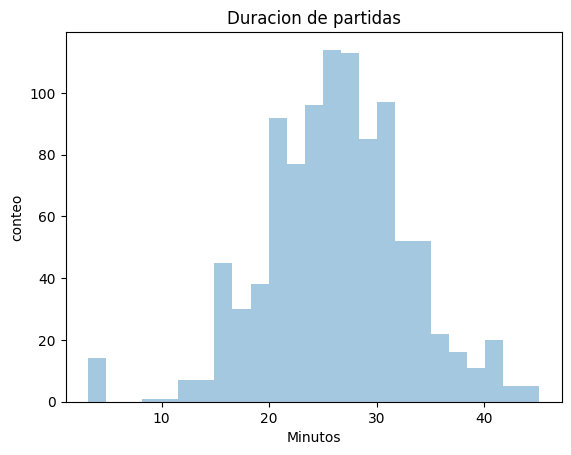

In [9]:
ax_duration = sns.distplot(df['gameDuration'], kde=False, norm_hist=False)
ax_duration.set(title='Duracion de partidas', xlabel='Minutos', ylabel='conteo');

In [10]:
df_groupby_win = df.groupby('win').count()
df_groupby_win

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,towerKillsTeam2,...,T2_P5_assists,T2_P5_largestKillingSpree,T2_P5_largestMultiKill,T2_P5_longestTimeSpentLiving,T2_P5_totalDamageDealt,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel,win_value
win,,,,,,,,,,,,,,,,,,,,,
Team 1,453,453,453,453,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453
Team 2,547,547,547,547,547,547,547,547,547,547,...,547,547,547,547,547,547,547,547,547,547


In [11]:
table_kills = pd.pivot_table(df, values=['T1_P1_kills','T1_P2_kills','T1_P3_kills','T1_P4_kills','T1_P5_kills',
                                         'T2_P1_kills','T2_P2_kills','T2_P3_kills','T2_P4_kills','T2_P5_kills'],
                       columns=['win'], aggfunc="sum")
table_kills

win,Team 1,Team 2
T1_P1_kills,2994,2317
T1_P2_kills,3003,2416
T1_P3_kills,2931,2203
T1_P4_kills,2703,2255
T1_P5_kills,2979,2164
T2_P1_kills,1811,3435
T2_P2_kills,1860,3520
T2_P3_kills,1888,3638
T2_P4_kills,1740,3444
T2_P5_kills,1940,3406


In [12]:
by_kills = df.groupby(level=0)[['T1_P1_kills','T1_P2_kills','T1_P3_kills','T1_P4_kills','T1_P5_kills',
                                         'T2_P1_kills','T2_P2_kills','T2_P3_kills','T2_P4_kills','T2_P5_kills']].sum()
by_kills['average_kills'] = by_kills[['T1_P1_kills', 'T1_P2_kills', 'T1_P3_kills', 'T1_P4_kills', 'T1_P5_kills',
                                  'T2_P1_kills', 'T2_P2_kills', 'T2_P3_kills', 'T2_P4_kills', 'T2_P5_kills']].mean(axis=1)
win = df.groupby(level=0)['win'].last()
merged = by_kills.merge(win, left_index=True, right_index=True)

merged

,T1_P1_kills,T1_P2_kills,T1_P3_kills,T1_P4_kills,T1_P5_kills,T2_P1_kills,T2_P2_kills,T2_P3_kills,T2_P4_kills,T2_P5_kills,average_kills,win
gameId,,,,,,,,,,,,
1667536113,1,13,2,5,14,4,13,2,8,7,6.9,Team 1
1667842792,4,7,3,7,11,1,1,15,13,6,6.8,Team 2
1668087096,2,10,2,4,5,1,3,4,0,0,3.1,Team 1
1668119389,1,2,2,1,1,0,4,4,3,5,2.3,Team 2
1668145581,3,2,0,2,2,10,7,3,5,3,3.7,Team 2
...,...,...,...,...,...,...,...,...,...,...,...,...
1675751630,4,6,2,9,7,11,9,4,2,13,6.7,Team 2
1675752205,6,27,0,15,9,21,27,39,15,21,18.0,Team 2
1675752893,8,4,4,8,4,8,4,40,28,40,14.8,Team 2


In [13]:
Team1 = by_kills[merged['win'] == 'Team 1']
Team2 = by_kills[merged['win'] == 'Team 2']
Team1

,T1_P1_kills,T1_P2_kills,T1_P3_kills,T1_P4_kills,T1_P5_kills,T2_P1_kills,T2_P2_kills,T2_P3_kills,T2_P4_kills,T2_P5_kills,average_kills
gameId,,,,,,,,,,,
1667536113,1,13,2,5,14,4,13,2,8,7,6.9
1668087096,2,10,2,4,5,1,3,4,0,0,3.1
1668162083,23,14,2,1,5,14,6,7,6,5,8.3
1668190393,0,6,1,5,5,1,0,1,0,1,2.0
1668206039,6,8,6,16,3,0,6,7,3,12,6.7
...,...,...,...,...,...,...,...,...,...,...,...
1675736297,12,6,20,12,14,10,4,2,16,12,10.8
1675750166,9,3,48,9,18,24,33,27,30,6,20.7
1675750589,21,39,3,27,33,15,6,6,60,15,22.5


<ipython-input-14-18c30b801337>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Team1['average_kills'], hist=False, kde_kws = {'shade': True}, label='Team1')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-14-18c30b801337>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level 

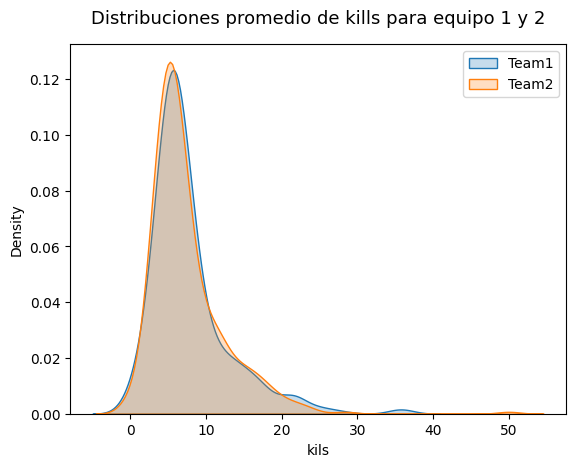

In [14]:
ax = sns.distplot(Team1['average_kills'], hist=False, kde_kws = {'shade': True}, label='Team1')
sns.distplot(Team2['average_kills'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Team2')
ax.set_title('Distribuciones promedio de kills para equipo 1 y 2', fontsize=13, pad=15);
ax.set(xlabel='kils');
ax.legend(loc='upper right');

In [15]:
by_kills = df.groupby(level=0)[['T1_P1_kills','T1_P2_kills','T1_P3_kills','T1_P4_kills','T1_P5_kills',
                                         'T2_P1_kills','T2_P2_kills','T2_P3_kills','T2_P4_kills','T2_P5_kills']].sum()

win = df.groupby(level=0)['win'].last()
merged = by_kills.merge(win, left_index=True, right_index=True)
merged

,T1_P1_kills,T1_P2_kills,T1_P3_kills,T1_P4_kills,T1_P5_kills,T2_P1_kills,T2_P2_kills,T2_P3_kills,T2_P4_kills,T2_P5_kills,win
gameId,,,,,,,,,,,
1667536113,1,13,2,5,14,4,13,2,8,7,Team 1
1667842792,4,7,3,7,11,1,1,15,13,6,Team 2
1668087096,2,10,2,4,5,1,3,4,0,0,Team 1
1668119389,1,2,2,1,1,0,4,4,3,5,Team 2
1668145581,3,2,0,2,2,10,7,3,5,3,Team 2
...,...,...,...,...,...,...,...,...,...,...,...
1675751630,4,6,2,9,7,11,9,4,2,13,Team 2
1675752205,6,27,0,15,9,21,27,39,15,21,Team 2
1675752893,8,4,4,8,4,8,4,40,28,40,Team 2


In [16]:
def sum_winning_team_kills(row):
    if row['win'] == 'Team 1':
        return row[['T1_P1_kills','T1_P2_kills','T1_P3_kills','T1_P4_kills','T1_P5_kills']].sum()
    else:
        return row[['T2_P1_kills','T2_P2_kills','T2_P3_kills','T2_P4_kills','T2_P5_kills']].sum()


In [17]:
merged['Winning_Team_Kills'] = merged.apply(sum_winning_team_kills, axis=1)
merged

,T1_P1_kills,T1_P2_kills,T1_P3_kills,T1_P4_kills,T1_P5_kills,T2_P1_kills,T2_P2_kills,T2_P3_kills,T2_P4_kills,T2_P5_kills,win,Winning_Team_Kills
gameId,,,,,,,,,,,,
1667536113,1,13,2,5,14,4,13,2,8,7,Team 1,35
1667842792,4,7,3,7,11,1,1,15,13,6,Team 2,36
1668087096,2,10,2,4,5,1,3,4,0,0,Team 1,23
1668119389,1,2,2,1,1,0,4,4,3,5,Team 2,16
1668145581,3,2,0,2,2,10,7,3,5,3,Team 2,28
...,...,...,...,...,...,...,...,...,...,...,...,...
1675751630,4,6,2,9,7,11,9,4,2,13,Team 2,39
1675752205,6,27,0,15,9,21,27,39,15,21,Team 2,123
1675752893,8,4,4,8,4,8,4,40,28,40,Team 2,120


In [18]:
Team1 = merged[merged['win'] == 'Team 1']
Team2 = merged[merged['win'] == 'Team 2']
Team1

,T1_P1_kills,T1_P2_kills,T1_P3_kills,T1_P4_kills,T1_P5_kills,T2_P1_kills,T2_P2_kills,T2_P3_kills,T2_P4_kills,T2_P5_kills,win,Winning_Team_Kills
gameId,,,,,,,,,,,,
1667536113,1,13,2,5,14,4,13,2,8,7,Team 1,35
1668087096,2,10,2,4,5,1,3,4,0,0,Team 1,23
1668162083,23,14,2,1,5,14,6,7,6,5,Team 1,45
1668190393,0,6,1,5,5,1,0,1,0,1,Team 1,17
1668206039,6,8,6,16,3,0,6,7,3,12,Team 1,39
...,...,...,...,...,...,...,...,...,...,...,...,...
1675736297,12,6,20,12,14,10,4,2,16,12,Team 1,64
1675750166,9,3,48,9,18,24,33,27,30,6,Team 1,87
1675750589,21,39,3,27,33,15,6,6,60,15,Team 1,123


<ipython-input-19-6bec484345f2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Team1['Winning_Team_Kills'], hist=False, kde_kws = {'shade': True}, label='Team1')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-19-6bec484345f2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-l

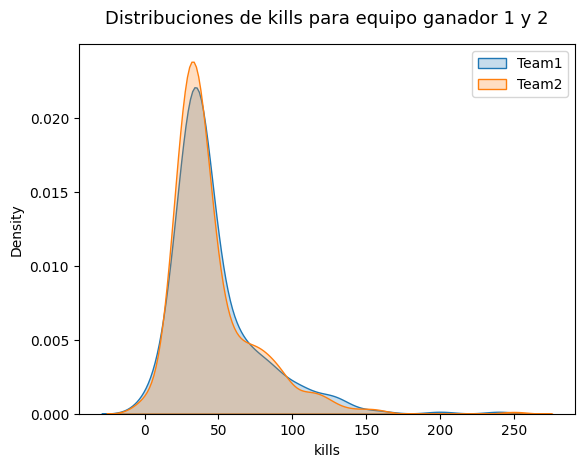

In [19]:
ax = sns.distplot(Team1['Winning_Team_Kills'], hist=False, kde_kws = {'shade': True}, label='Team1')
sns.distplot(Team2['Winning_Team_Kills'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Team2')
ax.set_title('Distribuciones de kills para equipo ganador 1 y 2', fontsize=13, pad=15);
ax.set(xlabel='kills');
ax.legend(loc='upper right');

In [20]:
df.head()

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_assists,T2_P5_largestKillingSpree,T2_P5_largestMultiKill,T2_P5_longestTimeSpentLiving,T2_P5_totalDamageDealt,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel,win_value
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,16,2,1,234,19197,6660,8363,7325,13,2
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,4,0,1,575,114261,10202,9375,7905,13,2
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,6,5,2,936,276137,29763,19615,19208,18,1
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,16,0,1,809,221048,10579,11586,10060,18,1
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,7,2,1,445,141373,17388,11657,11333,15,1


In [21]:
def sum_winning_team_kills(row):
    if row['win'] == 'Team 1':
        return row[['T1_P1_kills','T1_P2_kills','T1_P3_kills','T1_P4_kills','T1_P5_kills']].mean()
    else:
        return row[['T2_P1_kills','T2_P2_kills','T2_P3_kills','T2_P4_kills','T2_P5_kills']].mean()
df['Winning_Team_Kills'] = df.apply(sum_winning_team_kills, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_largestKillingSpree,T2_P5_largestMultiKill,T2_P5_longestTimeSpentLiving,T2_P5_totalDamageDealt,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel,win_value,Winning_Team_Kills
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,2,1,234,19197,6660,8363,7325,13,2,6.8
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,0,1,575,114261,10202,9375,7905,13,2,4.0
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,5,2,936,276137,29763,19615,19208,18,1,6.6
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,0,1,809,221048,10579,11586,10060,18,1,7.4
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,2,1,445,141373,17388,11657,11333,15,1,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,3,2,477,127050,12694,12384,10750,14,2,7.0
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,0,0,0,563,100,722,500,2,1,0.4
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,3,1,365,116160,17391,9493,8510,14,2,6.0


In [22]:
def loser_team_kills(row):
    if row['win'] == 'Team 1':
        return row[['T2_P1_kills','T2_P2_kills','T2_P3_kills','T2_P4_kills','T2_P5_kills']].mean()
    else:
        return row[['T1_P1_kills','T1_P2_kills','T1_P3_kills','T1_P4_kills','T1_P5_kills']].mean()
df['Loser_Team_Kills'] = df.apply(loser_team_kills, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_largestMultiKill,T2_P5_longestTimeSpentLiving,T2_P5_totalDamageDealt,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel,win_value,Winning_Team_Kills,Loser_Team_Kills
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,1,234,19197,6660,8363,7325,13,2,6.8,5.4
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,1,575,114261,10202,9375,7905,13,2,4.0,1.4
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,2,936,276137,29763,19615,19208,18,1,6.6,6.4
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,1,809,221048,10579,11586,10060,18,1,7.4,7.4
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,1,445,141373,17388,11657,11333,15,1,8.6,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,2,477,127050,12694,12384,10750,14,2,7.0,5.0
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,0,0,563,100,722,500,2,1,0.4,0.0
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,1,365,116160,17391,9493,8510,14,2,6.0,2.8


In [23]:
df['Winning_Team_Kills'] = df.apply(sum_winning_team_kills, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_largestMultiKill,T2_P5_longestTimeSpentLiving,T2_P5_totalDamageDealt,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel,win_value,Winning_Team_Kills,Loser_Team_Kills
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,1,234,19197,6660,8363,7325,13,2,6.8,5.4
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,1,575,114261,10202,9375,7905,13,2,4.0,1.4
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,2,936,276137,29763,19615,19208,18,1,6.6,6.4
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,1,809,221048,10579,11586,10060,18,1,7.4,7.4
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,1,445,141373,17388,11657,11333,15,1,8.6,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,2,477,127050,12694,12384,10750,14,2,7.0,5.0
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,0,0,563,100,722,500,2,1,0.4,0.0
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,1,365,116160,17391,9493,8510,14,2,6.0,2.8


In [24]:
def avg_winning_team_level(row):
    if row['win'] == 'Team 1':
        return row[['T1_P1_champLevel','T1_P2_champLevel','T1_P3_champLevel','T1_P4_champLevel','T1_P5_champLevel']].mean()
    else:
        return row[['T2_P1_champLevel','T2_P2_champLevel','T2_P3_champLevel','T2_P4_champLevel','T2_P5_champLevel']].mean()
df['Winning_Team_level'] = df.apply(avg_winning_team_level, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_longestTimeSpentLiving,T2_P5_totalDamageDealt,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel,win_value,Winning_Team_Kills,Loser_Team_Kills,Winning_Team_level
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,234,19197,6660,8363,7325,13,2,6.8,5.4,15.4
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,575,114261,10202,9375,7905,13,2,4.0,1.4,14.0
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,936,276137,29763,19615,19208,18,1,6.6,6.4,17.6
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,809,221048,10579,11586,10060,18,1,7.4,7.4,16.8
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,445,141373,17388,11657,11333,15,1,8.6,6.2,16.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,477,127050,12694,12384,10750,14,2,7.0,5.0,14.6
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,0,563,100,722,500,2,1,0.4,0.0,2.4
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,365,116160,17391,9493,8510,14,2,6.0,2.8,13.4


In [25]:
def avg_winning_team_deaths(row):
    if row['win'] == 'Team 1':
        return row[['T1_P1_deaths','T1_P2_deaths','T1_P3_deaths','T1_P4_deaths','T1_P5_deaths']].mean()
    else:
        return row[['T2_P1_deaths','T2_P2_deaths','T2_P3_deaths','T2_P4_deaths','T2_P5_deaths']].mean()
df['Winning_Team_deaths'] = df.apply(avg_winning_team_deaths, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_totalDamageDealt,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel,win_value,Winning_Team_Kills,Loser_Team_Kills,Winning_Team_level,Winning_Team_deaths
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,19197,6660,8363,7325,13,2,6.8,5.4,15.4,5.4
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,114261,10202,9375,7905,13,2,4.0,1.4,14.0,1.4
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,276137,29763,19615,19208,18,1,6.6,6.4,17.6,6.4
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,221048,10579,11586,10060,18,1,7.4,7.4,16.8,7.4
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,141373,17388,11657,11333,15,1,8.6,6.2,16.4,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,127050,12694,12384,10750,14,2,7.0,5.0,14.6,5.0
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,563,100,722,500,2,1,0.4,0.0,2.4,0.0
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,116160,17391,9493,8510,14,2,6.0,2.8,13.4,2.8


In [26]:
def avg_winning_team_assists(row):
    if row['win'] == 'Team 1':
        return row[['T1_P1_assists','T1_P2_assists','T1_P3_assists','T1_P5_assists']].mean()
    else:
        return row[['T2_P1_assists','T2_P2_assists','T2_P3_assists','T2_P4_assists','T2_P5_assists']].mean()
df['Winning_Team_assists'] = df.apply(avg_winning_team_assists, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_totalDamageDealtToChampions,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel,win_value,Winning_Team_Kills,Loser_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,6660,8363,7325,13,2,6.8,5.4,15.4,5.4,9.20
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,10202,9375,7905,13,2,4.0,1.4,14.0,1.4,5.20
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,29763,19615,19208,18,1,6.6,6.4,17.6,6.4,9.50
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,10579,11586,10060,18,1,7.4,7.4,16.8,7.4,11.50
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,17388,11657,11333,15,1,8.6,6.2,16.4,6.2,11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,12694,12384,10750,14,2,7.0,5.0,14.6,5.0,11.60
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,100,722,500,2,1,0.4,0.0,2.4,0.0,0.25
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,17391,9493,8510,14,2,6.0,2.8,13.4,2.8,6.00


In [27]:
def avg_winning_team_largestKillingSpree(row):
    if row['win'] == 'Team 1':
        return row[['T1_P1_largestKillingSpree','T1_P2_largestKillingSpree','T1_P3_largestKillingSpree','T1_P4_largestKillingSpree','T1_P5_largestKillingSpree']].mean()
    else:
        return row[['T2_P1_largestKillingSpree','T2_P2_largestKillingSpree','T2_P3_largestKillingSpree','T2_P4_largestKillingSpree','T2_P5_largestKillingSpree']].mean()
df['Winning_Team_largestKillingSpree'] = df.apply(avg_winning_team_largestKillingSpree, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_goldEarned,T2_P5_goldSpent,T2_P5_champLevel,win_value,Winning_Team_Kills,Loser_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists,Winning_Team_largestKillingSpree
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,8363,7325,13,2,6.8,5.4,15.4,5.4,9.20,4.2
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,9375,7905,13,2,4.0,1.4,14.0,1.4,5.20,3.2
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,19615,19208,18,1,6.6,6.4,17.6,6.4,9.50,3.2
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,11586,10060,18,1,7.4,7.4,16.8,7.4,11.50,3.6
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,11657,11333,15,1,8.6,6.2,16.4,6.2,11.50,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,12384,10750,14,2,7.0,5.0,14.6,5.0,11.60,3.4
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,722,500,2,1,0.4,0.0,2.4,0.0,0.25,0.0
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,9493,8510,14,2,6.0,2.8,13.4,2.8,6.00,3.2


In [28]:
def avg_winning_team_longestTimeSpentLiving(row):
    if row['win'] == 'Team 1':
        return row[['T1_P1_longestTimeSpentLiving','T1_P2_longestTimeSpentLiving','T1_P3_longestTimeSpentLiving','T1_P4_longestTimeSpentLiving']].mean()
    else:
        return row[['T2_P1_longestTimeSpentLiving','T2_P2_longestTimeSpentLiving','T2_P3_longestTimeSpentLiving','T2_P4_longestTimeSpentLiving','T2_P5_longestTimeSpentLiving']].mean()
df['Winning_Team_longestTimeSpentLiving'] = df.apply(avg_winning_team_longestTimeSpentLiving, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_goldSpent,T2_P5_champLevel,win_value,Winning_Team_Kills,Loser_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists,Winning_Team_largestKillingSpree,Winning_Team_longestTimeSpentLiving
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,7325,13,2,6.8,5.4,15.4,5.4,9.20,4.2,445.40
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,7905,13,2,4.0,1.4,14.0,1.4,5.20,3.2,340.80
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,19208,18,1,6.6,6.4,17.6,6.4,9.50,3.2,748.00
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,10060,18,1,7.4,7.4,16.8,7.4,11.50,3.6,581.00
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,11333,15,1,8.6,6.2,16.4,6.2,11.50,4.2,637.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,10750,14,2,7.0,5.0,14.6,5.0,11.60,3.4,480.00
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,500,2,1,0.4,0.0,2.4,0.0,0.25,0.0,0.00
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,8510,14,2,6.0,2.8,13.4,2.8,6.00,3.2,624.80


In [29]:
def avg_winning_team_totalDamageDealt(row):
    if row['win'] == 'Team 1':
        return row[['T1_P1_totalDamageDealt','T1_P2_totalDamageDealt','T1_P3_totalDamageDealt','T1_P4_totalDamageDealt','T1_P5_totalDamageDealt']].mean()
    else:
        return row[['T2_P1_totalDamageDealt','T2_P2_totalDamageDealt','T2_P3_totalDamageDealt','T2_P4_totalDamageDealt','T2_P5_totalDamageDealt']].mean()
df['Winning_Team_totalDamageDealt'] = df.apply(avg_winning_team_totalDamageDealt, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,T2_P5_champLevel,win_value,Winning_Team_Kills,Loser_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists,Winning_Team_largestKillingSpree,Winning_Team_longestTimeSpentLiving,Winning_Team_totalDamageDealt
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,13,2,6.8,5.4,15.4,5.4,9.20,4.2,445.40,130078.8
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,13,2,4.0,1.4,14.0,1.4,5.20,3.2,340.80,112959.8
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,18,1,6.6,6.4,17.6,6.4,9.50,3.2,748.00,211824.0
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,18,1,7.4,7.4,16.8,7.4,11.50,3.6,581.00,179359.0
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,15,1,8.6,6.2,16.4,6.2,11.50,4.2,637.25,150984.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,14,2,7.0,5.0,14.6,5.0,11.60,3.4,480.00,118107.6
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,2,1,0.4,0.0,2.4,0.0,0.25,0.0,0.00,4126.8
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,14,2,6.0,2.8,13.4,2.8,6.00,3.2,624.80,99174.6


In [30]:
def avg_winning_team_totalDamageDealtToChampions(row):
    if row['win'] == 'Team 1':
        return row[['T1_P1_totalDamageDealtToChampions','T1_P2_totalDamageDealtToChampions','T1_P3_totalDamageDealtToChampions','T1_P4_totalDamageDealtToChampions','T1_P5_totalDamageDealtToChampions']].mean()
    else:
        return row[['T2_P1_totalDamageDealtToChampions','T2_P2_totalDamageDealtToChampions','T2_P3_totalDamageDealtToChampions','T2_P5_totalDamageDealtToChampions']].mean()
df['Winning_Team_totalDamageDealtToChampions'] = df.apply(avg_winning_team_totalDamageDealtToChampions, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,win_value,Winning_Team_Kills,Loser_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists,Winning_Team_largestKillingSpree,Winning_Team_longestTimeSpentLiving,Winning_Team_totalDamageDealt,Winning_Team_totalDamageDealtToChampions
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,2,6.8,5.4,15.4,5.4,9.20,4.2,445.40,130078.8,18895.00
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,2,4.0,1.4,14.0,1.4,5.20,3.2,340.80,112959.8,10996.25
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,1,6.6,6.4,17.6,6.4,9.50,3.2,748.00,211824.0,31126.40
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,1,7.4,7.4,16.8,7.4,11.50,3.6,581.00,179359.0,20960.60
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,1,8.6,6.2,16.4,6.2,11.50,4.2,637.25,150984.8,21675.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,2,7.0,5.0,14.6,5.0,11.60,3.4,480.00,118107.6,15118.00
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,1,0.4,0.0,2.4,0.0,0.25,0.0,0.00,4126.8,601.40
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,2,6.0,2.8,13.4,2.8,6.00,3.2,624.80,99174.6,16130.00


In [31]:
def avg_winning_team_goldEarned(row):
    if row['win'] == 'Team 1':
        return row[['T1_P1_goldEarned','T1_P2_goldEarned','T1_P3_goldEarned','T1_P4_goldEarned','T1_P5_goldEarned']].mean()
    else:
        return row[['T2_P1_goldEarned','T2_P2_goldEarned','T2_P3_goldEarned','T2_P4_goldEarned','T2_P5_goldEarned']].mean()
df['Winning_Team_goldEarned'] = df.apply(avg_winning_team_goldEarned, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,Winning_Team_Kills,Loser_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists,Winning_Team_largestKillingSpree,Winning_Team_longestTimeSpentLiving,Winning_Team_totalDamageDealt,Winning_Team_totalDamageDealtToChampions,Winning_Team_goldEarned
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,6.8,5.4,15.4,5.4,9.20,4.2,445.40,130078.8,18895.00,12216.0
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,4.0,1.4,14.0,1.4,5.20,3.2,340.80,112959.8,10996.25,10054.6
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,6.6,6.4,17.6,6.4,9.50,3.2,748.00,211824.0,31126.40,15834.2
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,7.4,7.4,16.8,7.4,11.50,3.6,581.00,179359.0,20960.60,15138.4
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,8.6,6.2,16.4,6.2,11.50,4.2,637.25,150984.8,21675.40,13613.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,7.0,5.0,14.6,5.0,11.60,3.4,480.00,118107.6,15118.00,12309.6
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,0.4,0.0,2.4,0.0,0.25,0.0,0.00,4126.8,601.40,1094.0
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,6.0,2.8,13.4,2.8,6.00,3.2,624.80,99174.6,16130.00,9841.4


In [32]:
def avg_winning_team_goldSpent(row):
    if row['win'] == 'Team 1':
        return row[['T1_P1_goldSpent','T1_P2_goldSpent','T1_P3_goldSpent','T1_P4_goldSpent','T1_P5_goldSpent']].mean()
    else:
        return row[['T2_P1_goldSpent','T2_P2_goldSpent','T2_P3_goldSpent','T2_P4_goldSpent','T2_P5_goldSpent']].mean()
df['Winning_Team_goldSpent'] = df.apply(avg_winning_team_goldSpent, axis=1)
df

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,Loser_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists,Winning_Team_largestKillingSpree,Winning_Team_longestTimeSpentLiving,Winning_Team_totalDamageDealt,Winning_Team_totalDamageDealtToChampions,Winning_Team_goldEarned,Winning_Team_goldSpent
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,5.4,15.4,5.4,9.20,4.2,445.40,130078.8,18895.00,12216.0,10720.0
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,1.4,14.0,1.4,5.20,3.2,340.80,112959.8,10996.25,10054.6,8283.0
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,6.4,17.6,6.4,9.50,3.2,748.00,211824.0,31126.40,15834.2,14512.0
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,7.4,16.8,7.4,11.50,3.6,581.00,179359.0,20960.60,15138.4,14074.6
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,6.2,16.4,6.2,11.50,4.2,637.25,150984.8,21675.40,13613.6,12260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,5.0,14.6,5.0,11.60,3.4,480.00,118107.6,15118.00,12309.6,11240.6
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,0.0,2.4,0.0,0.25,0.0,0.00,4126.8,601.40,1094.0,500.0
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,2.8,13.4,2.8,6.00,3.2,624.80,99174.6,16130.00,9841.4,8807.0


In [33]:
df.columns

Index(['gameDuration', 'win', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 'towerKillsTeam1',
       'inhibitorKillsTeam1',
       ...
       'Loser_Team_Kills', 'Winning_Team_level', 'Winning_Team_deaths',
       'Winning_Team_assists', 'Winning_Team_largestKillingSpree',
       'Winning_Team_longestTimeSpentLiving', 'Winning_Team_totalDamageDealt',
       'Winning_Team_totalDamageDealtToChampions', 'Winning_Team_goldEarned',
       'Winning_Team_goldSpent'],
      dtype='object', length=170)

In [34]:
columns_to_drop=[
    'T2_P4_magicDamageDealt','T2_P4_trueDamageDealtToChampions','T1_P3_largestMultiKill','T1_P5_largestMultiKill','T2_P2_largestMultiKill','T2_P3_largestMultiKill','T2_P4_largestMultiKill','T2_P5_largestMultiKill',


    'T1_P1_highestAchievedSeasonTier', 'T1_P2_highestAchievedSeasonTier', 'T1_P3_highestAchievedSeasonTier', 'T1_P4_highestAchievedSeasonTier', 'T1_P5_highestAchievedSeasonTier',
'T2_P1_highestAchievedSeasonTier', 'T2_P2_highestAchievedSeasonTier', 'T2_P3_highestAchievedSeasonTier', 'T2_P4_highestAchievedSeasonTier', 'T2_P5_highestAchievedSeasonTier',
                            'T1_P1_kills','T1_P2_kills','T1_P3_kills','T1_P4_kills','T1_P5_kills','T2_P1_kills','T2_P2_kills','T2_P3_kills','T2_P4_kills','T2_P5_kills',
                                  'T1_P1_participantId','T1_P2_participantId','T1_P3_participantId','T1_P4_participantId','T1_P5_participantId','T2_P1_participantId','T2_P2_participantId','T2_P3_participantId','T2_P4_participantId','T2_P5_participantId',
                                  'T1_P1_championId','T1_P2_championId','T1_P3_championId','T1_P4_championId','T1_P5_championId','T2_P1_championId','T2_P2_championId','T2_P3_championId','T2_P4_championId','T2_P5_championId',
                                  'T1_P1_champLevel','T1_P2_champLevel','T1_P3_champLevel','T1_P4_champLevel','T1_P5_champLevel','T2_P1_champLevel','T2_P2_champLevel','T2_P3_champLevel','T2_P4_champLevel','T2_P5_champLevel',
                                  'T1_P1_deaths','T1_P2_deaths','T1_P3_deaths','T1_P4_deaths','T1_P5_deaths','T2_P1_deaths','T2_P2_deaths','T2_P3_deaths','T2_P4_deaths','T2_P5_deaths',
                                  'T1_P1_assists','T1_P2_assists','T1_P3_assists','T1_P4_assists','T1_P5_assists','T2_P1_assists','T2_P2_assists','T2_P3_assists','T2_P4_assists','T2_P5_assists',
                                  'T1_P1_largestKillingSpree','T1_P2_largestKillingSpree','T1_P3_largestKillingSpree','T1_P4_largestKillingSpree','T1_P5_largestKillingSpree',
                                  'T2_P1_largestKillingSpree','T2_P2_largestKillingSpree','T2_P3_largestKillingSpree','T2_P4_largestKillingSpree','T2_P5_largestKillingSpree',
                                  'T1_P1_longestTimeSpentLiving','T1_P2_longestTimeSpentLiving','T1_P3_longestTimeSpentLiving','T1_P4_longestTimeSpentLiving',
                                  'T2_P1_longestTimeSpentLiving','T2_P2_longestTimeSpentLiving','T2_P3_longestTimeSpentLiving','T2_P4_longestTimeSpentLiving','T2_P5_longestTimeSpentLiving',
                                  'T1_P1_totalDamageDealt','T1_P2_totalDamageDealt','T1_P3_totalDamageDealt','T1_P4_totalDamageDealt','T1_P5_totalDamageDealt',
                                  'T2_P1_totalDamageDealt','T2_P2_totalDamageDealt','T2_P3_totalDamageDealt','T2_P4_totalDamageDealt','T2_P5_totalDamageDealt',
                                  'T1_P1_totalDamageDealtToChampions','T1_P2_totalDamageDealtToChampions','T1_P3_totalDamageDealtToChampions','T1_P4_totalDamageDealtToChampions','T1_P5_totalDamageDealtToChampions',
                                  'T2_P1_totalDamageDealtToChampions','T2_P2_totalDamageDealtToChampions','T2_P3_totalDamageDealtToChampions','T2_P5_totalDamageDealtToChampions',
    'T1_P1_goldEarned','T1_P2_goldEarned','T1_P3_goldEarned','T1_P4_goldEarned','T1_P5_goldEarned','T2_P1_goldEarned','T2_P2_goldEarned','T2_P3_goldEarned','T2_P4_goldEarned','T2_P5_goldEarned',
    'T1_P1_goldSpent','T1_P2_goldSpent','T1_P3_goldSpent','T1_P4_goldSpent','T1_P5_goldSpent','T2_P1_goldSpent','T2_P2_goldSpent','T2_P3_goldSpent','T2_P4_goldSpent','T2_P5_goldSpent'
                                  ,'Loser_Team_Kills','win',
                                  'T1_P1_lane/role', 'T1_P2_lane/role', 'T1_P3_lane/role',
       'T1_P4_lane/role', 'T1_P5_lane/role', 'T2_P1_lane/role',
       'T2_P2_lane/role', 'T2_P3_lane/role', 'T2_P4_lane/role',
       'T2_P5_lane/role']
for column in columns_to_drop:
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")

# Drop columns from DataFrame
df_correlacion = df.drop(columns=columns_to_drop)

df_correlacion

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,towerKillsTeam2,...,Winning_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists,Winning_Team_largestKillingSpree,Winning_Team_longestTimeSpentLiving,Winning_Team_totalDamageDealt,Winning_Team_totalDamageDealtToChampions,Winning_Team_goldEarned,Winning_Team_goldSpent
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,1,0,2,2,1,0,4,0,8,...,6.8,15.4,5.4,9.20,4.2,445.40,130078.8,18895.00,12216.0,10720.0
1675473881,25.833333,2,2,2,2,1,2,2,0,7,...,4.0,14.0,1.4,5.20,3.2,340.80,112959.8,10996.25,10054.6,8283.0
1675418809,40.100000,1,0,1,1,1,2,10,3,3,...,6.6,17.6,6.4,9.50,3.2,748.00,211824.0,31126.40,15834.2,14512.0
1675393648,35.200000,2,0,1,1,1,1,11,5,2,...,7.4,16.8,7.4,11.50,3.6,581.00,179359.0,20960.60,15138.4,14074.6
1675321946,28.900000,1,0,1,1,2,2,11,4,1,...,8.6,16.4,6.2,11.50,4.2,637.25,150984.8,21675.40,13613.6,12260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,2,0,2,2,1,2,3,0,9,...,7.0,14.6,5.0,11.60,3.4,480.00,118107.6,15118.00,12309.6,11240.6
1669346455,3.233333,1,0,0,0,0,0,0,0,0,...,0.4,2.4,0.0,0.25,0.0,0.00,4126.8,601.40,1094.0,500.0
1669343827,23.216667,2,2,2,2,2,2,1,0,8,...,6.0,13.4,2.8,6.00,3.2,624.80,99174.6,16130.00,9841.4,8807.0


In [35]:
df_correlacion.columns

Index(['gameDuration', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 'towerKillsTeam1',
       'inhibitorKillsTeam1', 'towerKillsTeam2', 'inhibitorKillsTeam2',
       'win_value', 'Winning_Team_Kills', 'Winning_Team_level',
       'Winning_Team_deaths', 'Winning_Team_assists',
       'Winning_Team_largestKillingSpree',
       'Winning_Team_longestTimeSpentLiving', 'Winning_Team_totalDamageDealt',
       'Winning_Team_totalDamageDealtToChampions', 'Winning_Team_goldEarned',
       'Winning_Team_goldSpent'],
      dtype='object')

In [36]:
df_correlacion.corr()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,towerKillsTeam2,...,Winning_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists,Winning_Team_largestKillingSpree,Winning_Team_longestTimeSpentLiving,Winning_Team_totalDamageDealt,Winning_Team_totalDamageDealtToChampions,Winning_Team_goldEarned,Winning_Team_goldSpent
gameDuration,1.000000,-0.004921,0.060336,0.374434,0.596553,0.233785,0.093929,0.371731,0.264114,0.390433,...,0.701786,0.954913,0.830668,0.713426,0.234391,0.546256,0.958411,0.893366,0.974597,0.969278
firstBlood,-0.004921,1.000000,0.221777,0.146342,0.021377,0.126259,0.213042,-0.197462,-0.144845,0.225625,...,0.051527,0.021199,-0.011117,0.017810,0.084713,0.044516,-0.013481,0.012253,0.015405,0.011227
firstTower,0.060336,0.221777,1.000000,0.343384,0.189889,0.338973,0.317866,-0.514479,-0.384359,0.539356,...,0.036408,0.080230,0.042116,0.046807,0.011225,0.077721,0.059913,0.046380,0.069665,0.070760
firstInhibitor,0.374434,0.146342,0.343384,1.000000,0.484529,0.265032,0.255685,-0.273125,-0.260623,0.747983,...,0.333285,0.396427,0.302667,0.343268,0.170108,0.294225,0.364671,0.343307,0.416551,0.382379
firstBaron,0.596553,0.021377,0.189889,0.484529,1.000000,0.203253,0.155746,-0.071523,-0.148333,0.573828,...,0.413629,0.614256,0.501605,0.454878,0.104424,0.357217,0.553363,0.519693,0.591823,0.581513
firstDragon,0.233785,0.126259,0.338973,0.265032,0.203253,1.000000,0.269803,-0.163818,-0.147487,0.352945,...,0.211223,0.275014,0.204970,0.202631,0.158613,0.186009,0.217638,0.185005,0.249725,0.247764
firstRiftHerald,0.093929,0.213042,0.317866,0.255685,0.155746,0.269803,1.000000,-0.234543,-0.155402,0.372402,...,0.069424,0.155141,0.003510,0.016787,0.129054,0.182359,0.087400,0.033192,0.112916,0.091962
towerKillsTeam1,0.371731,-0.197462,-0.514479,-0.273125,-0.071523,-0.163818,-0.234543,1.000000,0.837634,-0.572361,...,0.326288,0.376902,0.324546,0.294259,0.208478,0.208387,0.366481,0.336447,0.382666,0.374274
inhibitorKillsTeam1,0.264114,-0.144845,-0.384359,-0.260623,-0.148333,-0.147487,-0.155402,0.837634,1.000000,-0.523742,...,0.235699,0.249238,0.220242,0.183654,0.193454,0.161196,0.280729,0.241232,0.280380,0.274703
towerKillsTeam2,0.390433,0.225625,0.539356,0.747983,0.573828,0.352945,0.372402,-0.572361,-0.523742,1.000000,...,0.255775,0.389992,0.324081,0.286099,0.058775,0.232876,0.382487,0.343219,0.400970,0.383226


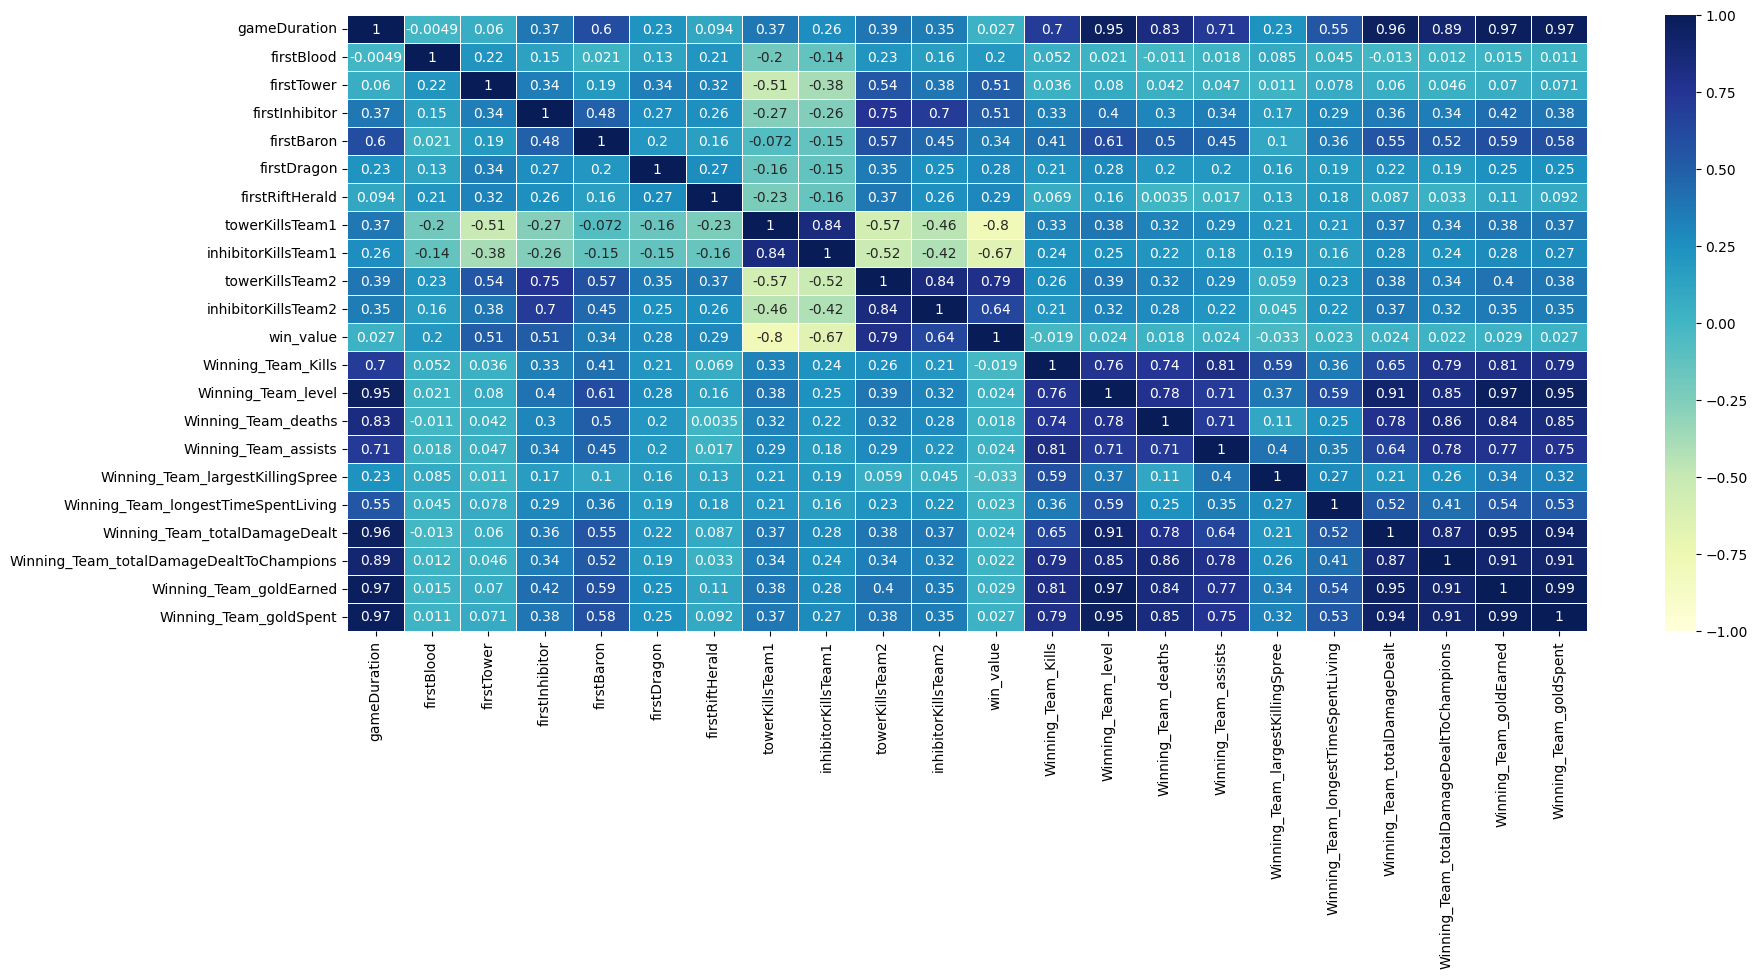

In [37]:
plt.figure(figsize=(20, 8))
ax = sns.heatmap(df_correlacion.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

<Axes: xlabel='gameDuration', ylabel='Winning_Team_Kills'>

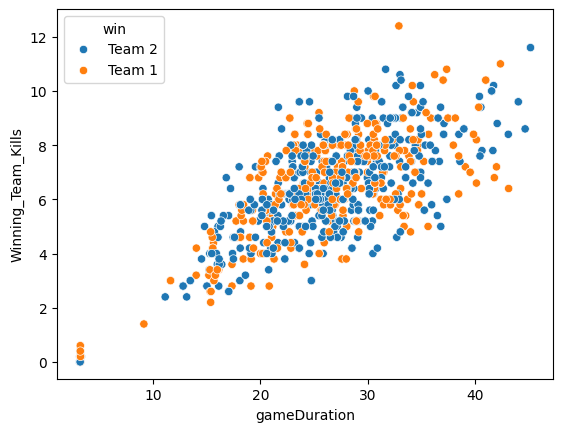

In [38]:
sns.scatterplot(x=df['gameDuration'], y=df['Winning_Team_Kills'],hue=df['win'])

<Axes: xlabel='gameDuration', ylabel='Winning_Team_level'>

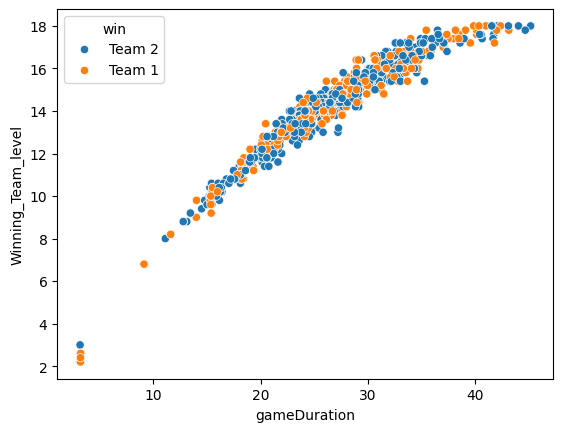

In [39]:
sns.scatterplot(x=df['gameDuration'], y=df['Winning_Team_level'], hue=df['win'])

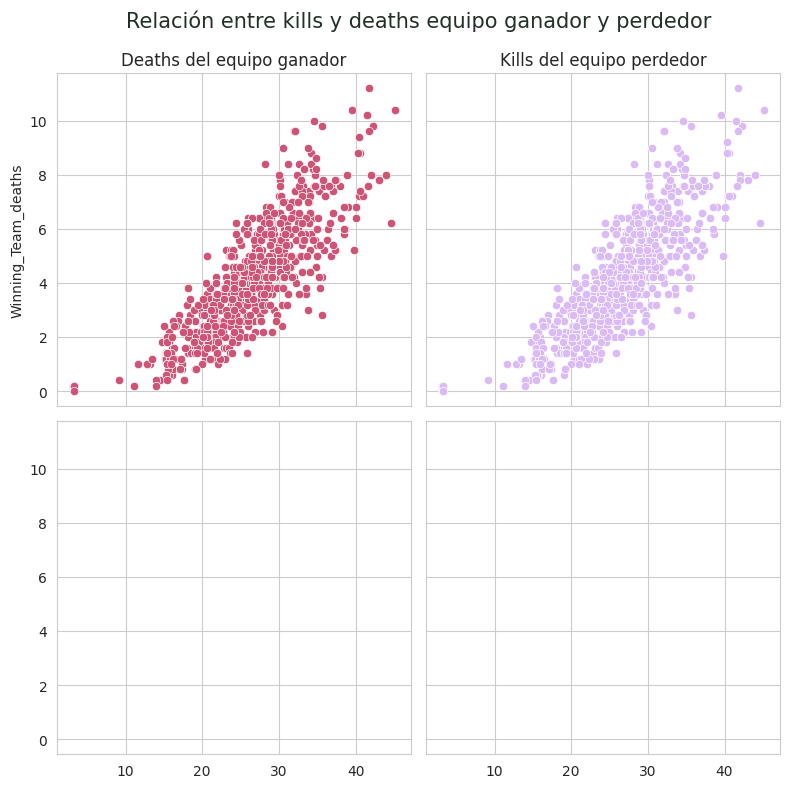

In [40]:
sns.set_style('whitegrid')
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(2, 2, sharex=True, sharey=True)

sns.scatterplot(x=df['gameDuration'], y=df['Winning_Team_deaths'], ax=axes[0, 0], color=palette[2])
sns.scatterplot(x=df['gameDuration'], y=df['Loser_Team_Kills'], ax=axes[0, 1], color=palette[3]);

axes[0, 0].set_title('Deaths del equipo ganador')
axes[0, 1].set_title('Kills del equipo perdedor')

fig.suptitle('Relación entre kills y deaths equipo ganador y perdedor', fontsize=15, c=palette[0], x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

<Axes: xlabel='win_value', ylabel='firstBlood'>

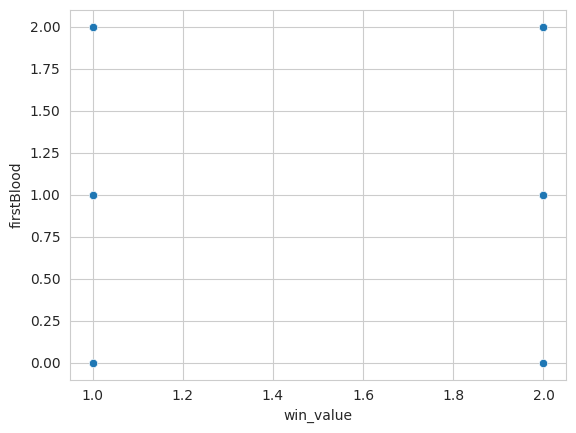

In [41]:
sns.scatterplot(x=df['win_value'], y=df['firstBlood'])

<Axes: xlabel='Loser_Team_Kills', ylabel='Winning_Team_Kills'>

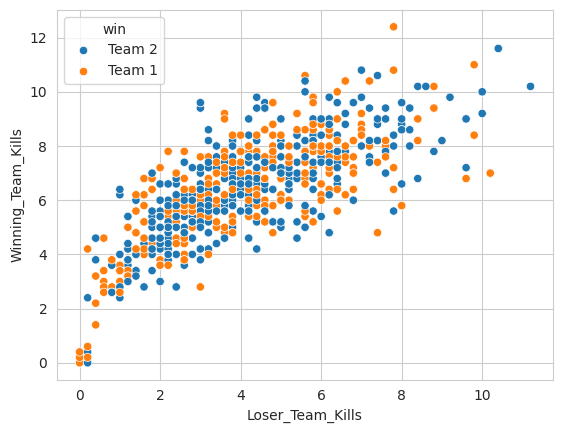

In [42]:
sns.scatterplot(x=df['Loser_Team_Kills'], y=df['Winning_Team_Kills'],hue=df['win'])

In [43]:
Team_Kills = df['Winning_Team_Kills']

means = []

for i in range(100_000):
    sample = Team_Kills.sample(n=50, replace=True)
    means.append(sample.mean())

serie_means = pd.Series(means)

<ipython-input-44-25307f805b49>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Winning_Team_Kills'], kde=False, norm_hist=False);


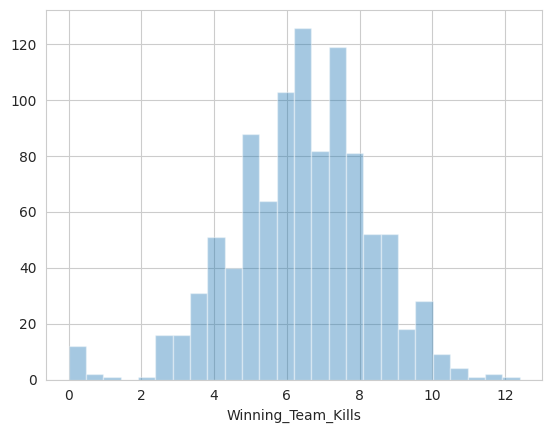

In [44]:
sns.distplot(df['Winning_Team_Kills'], kde=False, norm_hist=False);

<ipython-input-45-d2c307f276f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Team_Kills, kde=False, norm_hist=False);


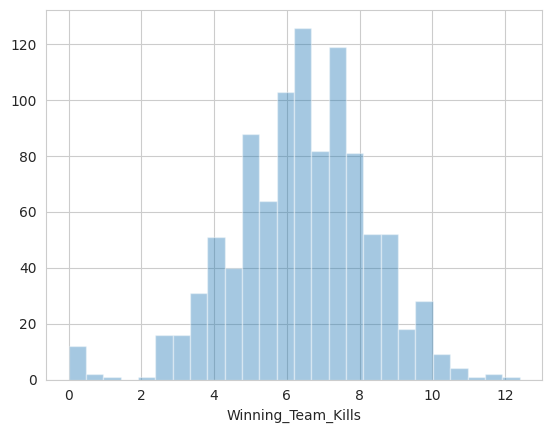

In [45]:
sns.distplot(Team_Kills, kde=False, norm_hist=False);

Asimetria negativa, los datos estan mas concentados en la derecha

In [46]:
serie_means.skew()

-0.04786462500846564

Kurtosis : Leptocurtosis - datos mas concetados al centro

In [47]:
serie_means.kurtosis()

0.006392013267574548

Regresion Lineal multiple

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate


In [107]:
X = df[['Winning_Team_Kills', 'Winning_Team_level']]
y = df['gameDuration']

In [108]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [109]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [110]:
y_train_pred = lr.predict(X_training)
MSE = mean_squared_error(y_training,y_train_pred)
MSE

3.655027839621404

In [111]:
y_test_pred = lr.predict(X_test)
MSE = (mean_squared_error(y_test,y_test_pred))
MSE

4.446543747436789

In [112]:
lr.score(X_test, y_test)

0.908251907403205

In [113]:
df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_pred, 'diferencia':y_test-y_test_pred})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion,diferencia
0,35.983333,34.300962,1.682372
1,24.800000,24.043428,0.756572
2,18.416667,19.498576,-1.081910
3,26.733333,26.267082,0.466252
4,27.550000,25.779366,1.770634
5,19.000000,19.644891,-0.644891
6,23.083333,23.928732,-0.845398
7,21.150000,21.202896,-0.052896
8,27.000000,25.747747,1.252253
9,31.050000,29.756110,1.293890


Polinomio de grado 2

In [114]:
from sklearn.preprocessing import PolynomialFeatures

In [115]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

In [116]:
Xpolytrain = poly.fit_transform(X_training)
Xpolytest = poly.fit_transform(X_test)

In [117]:
poly_model.fit(Xpolytrain, y_training)
y_train_predict2 = poly_model.predict(Xpolytrain)

In [118]:
MSE = mean_squared_error(y_training,y_train_predict2)
MSE

2.162561698972432

In [119]:
y_test_predict2 = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(y_test, y_test_predict2))
MSE

2.117723463498925

In [120]:
df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict2, 'diferencia':y_test-y_test_predict2})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion,diferencia
0,35.983333,35.485998,0.497335
1,24.800000,23.305088,1.494912
2,18.416667,18.699578,-0.282911
3,26.733333,25.706602,1.026731
4,27.550000,25.086753,2.463247
5,19.000000,18.939199,0.060801
6,23.083333,23.013035,0.070298
7,21.150000,20.375058,0.774942
8,27.000000,25.145644,1.854356
9,31.050000,29.747145,1.302855


Cross validation

In [63]:
scores = cross_validate(lr, X, y, scoring='r2')
scores

{'fit_time': array([0.00609803, 0.00310922, 0.00255609, 0.00329137, 0.0025003 ]),
 'score_time': array([0.00224471, 0.00153542, 0.0014782 , 0.00159574, 0.00164413]),
 'test_score': array([0.90361078, 0.90630754, 0.91616579, 0.91960189, 0.9190945 ])}

In [64]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.913 +/- 0.007


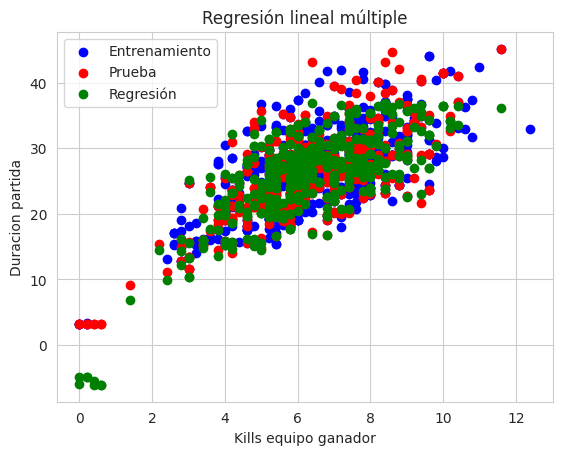

In [65]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los puntos de entrenamiento
ax.scatter(X_training['Winning_Team_Kills'], y_training, color='blue', label='Entrenamiento')

# Graficar los puntos de prueba
ax.scatter(X_test['Winning_Team_Kills'], y_test, color='red', label='Prueba')

# Graficar la recta de regresión

ax.scatter(X_test['Winning_Team_Kills'], y_test_pred, color='green', label='Regresión')

# Agregar etiquetas al eje X e Y
ax.set_ylabel("Duracion partida")
ax.set_xlabel("Kills equipo ganador")

# Agregar un título al gráfico
ax.set_title("Regresión lineal múltiple")

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

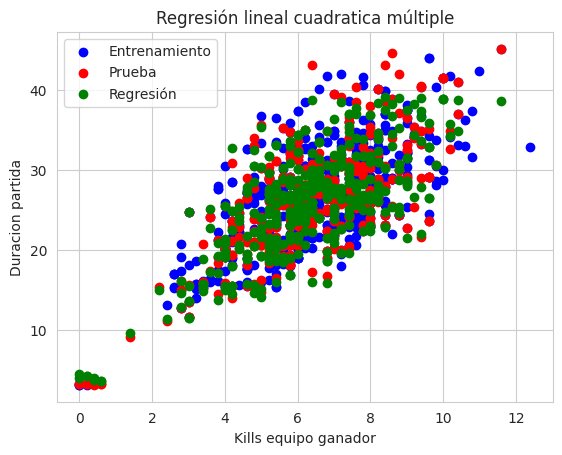

In [66]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los puntos de entrenamiento
ax.scatter(X_training['Winning_Team_Kills'], y_training, color='blue', label='Entrenamiento')

# Graficar los puntos de prueba
ax.scatter(X_test['Winning_Team_Kills'], y_test, color='red', label='Prueba')

# Graficar la recta de regresión

ax.scatter(X_test['Winning_Team_Kills'], y_test_predict2, color='green', label='Regresión')

# Agregar etiquetas al eje X e Y
ax.set_ylabel("Duracion partida")
ax.set_xlabel("Kills equipo ganador")

# Agregar un título al gráfico
ax.set_title("Regresión lineal cuadratica múltiple")

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

PRUEBA AB

In [67]:
total_count = df.groupby('win')[['Winning_Team_Kills', 'Loser_Team_Kills']].sum()

total_count

,Winning_Team_Kills,Loser_Team_Kills
win,,
Team 1,2922.0,1847.8
Team 2,3488.6,2271.0


In [68]:
total_count['success rate'] = total_count['Winning_Team_Kills'] / (total_count['Loser_Team_Kills'] + total_count['Loser_Team_Kills'])

total_count

,Winning_Team_Kills,Loser_Team_Kills,success rate
win,,,
Team 1,2922.0,1847.8,0.790670
Team 2,3488.6,2271.0,0.768076


In [69]:
df_correlacion

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,towerKillsTeam2,...,Winning_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists,Winning_Team_largestKillingSpree,Winning_Team_longestTimeSpentLiving,Winning_Team_totalDamageDealt,Winning_Team_totalDamageDealtToChampions,Winning_Team_goldEarned,Winning_Team_goldSpent
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,1,0,2,2,1,0,4,0,8,...,6.8,15.4,5.4,9.20,4.2,445.40,130078.8,18895.00,12216.0,10720.0
1675473881,25.833333,2,2,2,2,1,2,2,0,7,...,4.0,14.0,1.4,5.20,3.2,340.80,112959.8,10996.25,10054.6,8283.0
1675418809,40.100000,1,0,1,1,1,2,10,3,3,...,6.6,17.6,6.4,9.50,3.2,748.00,211824.0,31126.40,15834.2,14512.0
1675393648,35.200000,2,0,1,1,1,1,11,5,2,...,7.4,16.8,7.4,11.50,3.6,581.00,179359.0,20960.60,15138.4,14074.6
1675321946,28.900000,1,0,1,1,2,2,11,4,1,...,8.6,16.4,6.2,11.50,4.2,637.25,150984.8,21675.40,13613.6,12260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,2,0,2,2,1,2,3,0,9,...,7.0,14.6,5.0,11.60,3.4,480.00,118107.6,15118.00,12309.6,11240.6
1669346455,3.233333,1,0,0,0,0,0,0,0,0,...,0.4,2.4,0.0,0.25,0.0,0.00,4126.8,601.40,1094.0,500.0
1669343827,23.216667,2,2,2,2,2,2,1,0,8,...,6.0,13.4,2.8,6.00,3.2,624.80,99174.6,16130.00,9841.4,8807.0


In [70]:
df_correlacion.columns

Index(['gameDuration', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 'towerKillsTeam1',
       'inhibitorKillsTeam1', 'towerKillsTeam2', 'inhibitorKillsTeam2',
       'win_value', 'Winning_Team_Kills', 'Winning_Team_level',
       'Winning_Team_deaths', 'Winning_Team_assists',
       'Winning_Team_largestKillingSpree',
       'Winning_Team_longestTimeSpentLiving', 'Winning_Team_totalDamageDealt',
       'Winning_Team_totalDamageDealtToChampions', 'Winning_Team_goldEarned',
       'Winning_Team_goldSpent'],
      dtype='object')

In [71]:
df_logistica = df[['win_value','Winning_Team_Kills', 'Loser_Team_Kills']]
df_logistica

,win_value,Winning_Team_Kills,Loser_Team_Kills
gameId,,,
1675507159,2,6.8,5.4
1675473881,2,4.0,1.4
1675418809,1,6.6,6.4
1675393648,1,7.4,7.4
1675321946,1,8.6,6.2
...,...,...,...
1669356054,2,7.0,5.0
1669346455,1,0.4,0.0
1669343827,2,6.0,2.8


In [72]:
df_logistica['win_value'] = df_logistica['win_value'].apply(lambda x: 1 if x == 1 else 0)
df_logistica

<ipython-input-72-fb101a4a1ba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistica['win_value'] = df_logistica['win_value'].apply(lambda x: 1 if x == 1 else 0)


,win_value,Winning_Team_Kills,Loser_Team_Kills
gameId,,,
1675507159,0,6.8,5.4
1675473881,0,4.0,1.4
1675418809,1,6.6,6.4
1675393648,1,7.4,7.4
1675321946,1,8.6,6.2
...,...,...,...
1669356054,0,7.0,5.0
1669346455,1,0.4,0.0
1669343827,0,6.0,2.8


In [126]:
df_logistica['win_value'].unique()

array([0, 1])

In [127]:
X = df_logistica.drop(columns=['win_value'])
y = df_logistica['win_value']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [129]:
logreg = LogisticRegression(max_iter = 10000)

In [130]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [131]:
LogisticRegression(max_iter=10000)

LogisticRegression(max_iter=10000)

In [132]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [133]:
logreg.score(X_test, y_test)

0.5466666666666666

In [134]:
from sklearn import metrics

In [135]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[158,   3],
       [133,   6]])

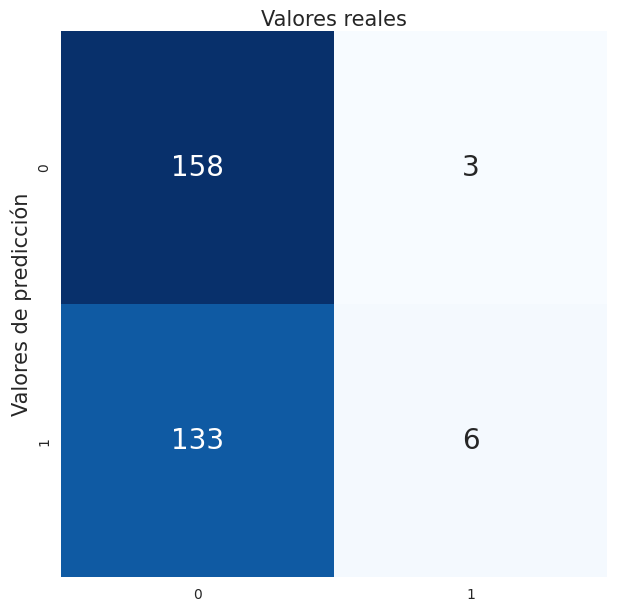

In [136]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Valores de predicción', fontsize=15, y=0.5)
plt.xlabel('Valores reales', fontsize=15);

In [84]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.5
Exactitud: 0.5833333333333334
Sensibilidad: 0.232
Especificidad: 0.8342857142857143


Segunda regresion logistica

In [85]:
df_Rlogistica

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,Loser_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists,Winning_Team_largestKillingSpree,Winning_Team_longestTimeSpentLiving,Winning_Team_totalDamageDealt,Winning_Team_totalDamageDealtToChampions,Winning_Team_goldEarned,Winning_Team_goldSpent
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,5.4,15.4,5.4,9.20,4.2,445.40,130078.8,18895.00,12216.0,10720.0
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,1.4,14.0,1.4,5.20,3.2,340.80,112959.8,10996.25,10054.6,8283.0
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,6.4,17.6,6.4,9.50,3.2,748.00,211824.0,31126.40,15834.2,14512.0
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,7.4,16.8,7.4,11.50,3.6,581.00,179359.0,20960.60,15138.4,14074.6
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,6.2,16.4,6.2,11.50,4.2,637.25,150984.8,21675.40,13613.6,12260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,5.0,14.6,5.0,11.60,3.4,480.00,118107.6,15118.00,12309.6,11240.6
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,0.0,2.4,0.0,0.25,0.0,0.00,4126.8,601.40,1094.0,500.0
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,2.8,13.4,2.8,6.00,3.2,624.80,99174.6,16130.00,9841.4,8807.0


In [86]:
df_Rlogistica['win_value'] = df_Rlogistica['win_value'].apply(lambda x: 1 if x == 1 else 0)
df_Rlogistica

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKillsTeam1,inhibitorKillsTeam1,...,Loser_Team_Kills,Winning_Team_level,Winning_Team_deaths,Winning_Team_assists,Winning_Team_largestKillingSpree,Winning_Team_longestTimeSpentLiving,Winning_Team_totalDamageDealt,Winning_Team_totalDamageDealtToChampions,Winning_Team_goldEarned,Winning_Team_goldSpent
gameId,,,,,,,,,,,,,,,,,,,,,
1675507159,29.950000,Team 2,1,0,2,2,1,0,4,0,...,5.4,15.4,5.4,9.20,4.2,445.40,130078.8,18895.00,12216.0,10720.0
1675473881,25.833333,Team 2,2,2,2,2,1,2,2,0,...,1.4,14.0,1.4,5.20,3.2,340.80,112959.8,10996.25,10054.6,8283.0
1675418809,40.100000,Team 1,1,0,1,1,1,2,10,3,...,6.4,17.6,6.4,9.50,3.2,748.00,211824.0,31126.40,15834.2,14512.0
1675393648,35.200000,Team 1,2,0,1,1,1,1,11,5,...,7.4,16.8,7.4,11.50,3.6,581.00,179359.0,20960.60,15138.4,14074.6
1675321946,28.900000,Team 1,1,0,1,1,2,2,11,4,...,6.2,16.4,6.2,11.50,4.2,637.25,150984.8,21675.40,13613.6,12260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669356054,27.583333,Team 2,2,0,2,2,1,2,3,0,...,5.0,14.6,5.0,11.60,3.4,480.00,118107.6,15118.00,12309.6,11240.6
1669346455,3.233333,Team 1,1,0,0,0,0,0,0,0,...,0.0,2.4,0.0,0.25,0.0,0.00,4126.8,601.40,1094.0,500.0
1669343827,23.216667,Team 2,2,2,2,2,2,2,1,0,...,2.8,13.4,2.8,6.00,3.2,624.80,99174.6,16130.00,9841.4,8807.0


In [87]:
X = df_Rlogistica.drop(columns=['win_value','win',
'T2_P4_magicDamageDealt','T2_P4_trueDamageDealtToChampions','T1_P3_largestMultiKill','T1_P5_largestMultiKill','T2_P2_largestMultiKill','T2_P3_largestMultiKill','T2_P4_largestMultiKill','T2_P5_largestMultiKill',
'T1_P1_highestAchievedSeasonTier', 'T1_P2_highestAchievedSeasonTier', 'T1_P3_highestAchievedSeasonTier', 'T1_P4_highestAchievedSeasonTier', 'T1_P5_highestAchievedSeasonTier',
'T2_P1_highestAchievedSeasonTier', 'T2_P2_highestAchievedSeasonTier', 'T2_P3_highestAchievedSeasonTier', 'T2_P4_highestAchievedSeasonTier', 'T2_P5_highestAchievedSeasonTier',
'T1_P1_lane/role','T1_P5_lane/role','T1_P2_lane/role','T1_P2_lane/role','T1_P3_lane/role','T1_P4_lane/role',
'T2_P1_lane/role','T2_P5_lane/role','T2_P2_lane/role','T2_P2_lane/role','T2_P3_lane/role','T2_P4_lane/role'])
y = df_Rlogistica['win_value']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [89]:
logreg = LogisticRegression(max_iter = 10000)

In [90]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [91]:
LogisticRegression(max_iter=10000)

LogisticRegression(max_iter=10000)

In [92]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [93]:
logreg.score(X_test, y_test)

0.96

In [94]:
from sklearn import metrics

In [95]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[143,   7],
       [  5, 145]])

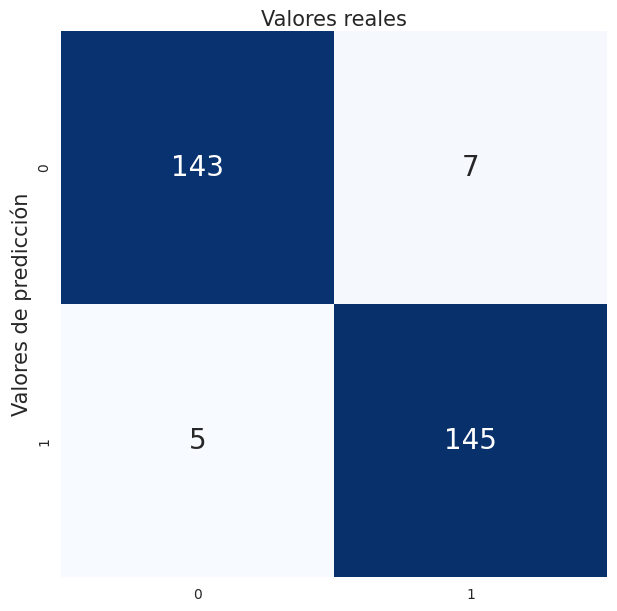

In [124]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Valores de predicción', fontsize=15, y=0.5)
plt.xlabel('Valores reales', fontsize=15);

In [97]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.9539473684210527
Exactitud: 0.96
Sensibilidad: 0.9666666666666667
Especificidad: 0.9533333333333334
